# EDA paired concatenated

First we do some cleaning of the dataset because there are some unused columns.

In [494]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wandb
import os

In [495]:
'''
# -----------------------------------------------------------------------------
# W&B Setup
# -----------------------------------------------------------------------------
PROJECT_NAME = "BA_Project_ZHAW"
print(f"PROJECT_NAME: {PROJECT_NAME}")
run = wandb.init(project=PROJECT_NAME, job_type=f"download dataset", entity="ba-zhaw")
config = wandb.config


# Download corresponding artifact (= dataset) from W&B
precision = "allele" # gene or allele
levenshtein_data_path = f"../../data/EDA/paired/"
download_path = "../../data/WnB_Download/paired"
output_path = f'../../data/EDA/paired/'
output_file_name = f'paired_{precision}_levenshtein.tsv'
dataset_name = f"paired_{precision}"
artifact = run.use_artifact(f"{dataset_name}:latest")
data_dir = artifact.download(download_path)

run.finish()
'''

'\n# -----------------------------------------------------------------------------\n# W&B Setup\n# -----------------------------------------------------------------------------\nPROJECT_NAME = "BA_Project_ZHAW"\nprint(f"PROJECT_NAME: {PROJECT_NAME}")\nrun = wandb.init(project=PROJECT_NAME, job_type=f"download dataset", entity="ba-zhaw")\nconfig = wandb.config\n\n\n# Download corresponding artifact (= dataset) from W&B\nprecision = "allele" # gene or allele\nlevenshtein_data_path = f"../../data/EDA/paired/"\ndownload_path = "../../data/WnB_Download/paired"\noutput_path = f\'../../data/EDA/paired/\'\noutput_file_name = f\'paired_{precision}_levenshtein.tsv\'\ndataset_name = f"paired_{precision}"\nartifact = run.use_artifact(f"{dataset_name}:latest")\ndata_dir = artifact.download(download_path)\n\nrun.finish()\n'

In [496]:
precision = 'gene'
otherprecision = 'allele'
data_dir = '../../data/WnB_Download/paired'
levenshtein_data_path = '../../data/EDA/paired'
positive_only_data_path = f'../../data/EDA/paired/paired_{precision}_positive_only.tsv'
positive_only_data_path_2 = f'../../data/EDA/paired/paired_{otherprecision}_positive_only.tsv'
positive_only_data_path_beta_allele = f'../../data/EDA/beta/beta_allele_positive_only.tsv'
positive_only_data_path_beta_gene = f'../../data/EDA/beta/beta_gene_positive_only.tsv'


train_file_path = f"{data_dir}/{precision}/train.tsv"
test_file_path = f"{data_dir}/{precision}/test_reclassified_paired_specific.tsv" # because seen in this case is either alpha or beta chain
val_file_path = f"{data_dir}/{precision}/validation.tsv"

df_train = pd.read_csv(train_file_path, sep="\t")
df_test = pd.read_csv(test_file_path, sep="\t")
df_validation = pd.read_csv(val_file_path, sep="\t")
df_seen = pd.concat([df_train, df_validation])
df_levenshtein = pd.read_csv(f"{levenshtein_data_path}/paired_{precision}_levenshtein.tsv", sep="\t") #  remove if levenshtein data isn't available
df = pd.read_csv(positive_only_data_path, sep="\t")
df_other = pd.read_csv(positive_only_data_path_2, sep="\t")
df_beta_gene = pd.read_csv(positive_only_data_path_beta_gene, sep="\t")
df_beta_allele = pd.read_csv(positive_only_data_path_beta_allele, sep="\t")

In [497]:
train_file_path

'../../data/WnB_Download/paired/gene/train.tsv'

In [498]:
output_filename = f"../../data/EDA/paired/ydata_profiling_{precision}.html"
#df = pd.concat([df_train, df_validation, df_test])
df = df.drop(columns=["TCR_name", "TRAC", "TRBC"], errors='ignore') # not interesting
print(f"the whole dataset has {len(df)} entries and the following columns are considered for this notebook:")
df.head()

the whole dataset has 48161 entries and the following columns are considered for this notebook:


,TRAV,TRAJ,TRA_CDR3,TRBV,TRBJ,TRB_CDR3,Epitope,MHC,Binding,task
0,TRAV19,TRAJ20,CALRDYKLSF,TRBV3-1,TRBJ1-4,CASSQTMTEGTPEKLFF,AVFDRKSDAK,HLA-A,1,NaN
1,TRAV17,TRAJ36,CARDQTGANNLFF,TRBV19,TRBJ1-1,CASSIGTGNTEAFF,KLGGALQAK,HLA-A,1,NaN
2,TRAV13-1,TRAJ44,CAASMGTGTASKLTF,TRBV9,TRBJ1-2,CASSPRGPAYGYTF,KLGGALQAK,HLA-A,1,NaN
3,TRAV24,TRAJ4,CAFASFLGGYNKLIF,TRBV15,TRBJ2-5,CATSGLKETQYF,KLGGALQAK,HLA-A,1,NaN
4,TRAV14/DV4,TRAJ32,CAMGGGYGGATNKLIF,TRBV9,TRBJ1-1,CASSASQFAEAFF,IVTDFSVIK,HLA-A,1,NaN


In [499]:
duplicateRows = df[df.duplicated()]
duplicateRows[duplicateRows['Binding'] == 0]

,TRAV,TRAJ,TRA_CDR3,TRBV,TRBJ,TRB_CDR3,Epitope,MHC,Binding,task


In [500]:
#df[(df['TRB_CDR3'] == "CAWSETGLGMGGWQF") & (df['Epitope'] == "AVFDRKSDAK")]

In [501]:
#df[df['Binding'] == 1].to_csv(f"{output_path}/paired_{precision}_positive_only.tsv", sep='\t', index=False)
#df_positive = df[df['Binding'] == 1]

## Pandas Profiling
pandas-profiling package naming was changed. To continue profiling data use ydata-profiling instead!
-> That's why we use ydata-profiling

In [502]:
from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title="Profiling Report")

In [503]:
#profile.to_widgets()
#profile.to_file(output_filename)

In [504]:
#profile = ProfileReport(df_levenshtein, title=f"Report paired levenshtein {precision}")
#levenshtein_data_path = f"/home/ubuntu/BA_ZHAW/data/EDA/paired/"
#profile.to_file(f"{levenshtein_data_path}/profiling_{precision}_levenshtein.tsv")

## Tasks

In [505]:
print("Each entry has a minimum levenshtein to the seen data. From this values, we take the mean.")
df_levenshtein_TPP2 = df_levenshtein[df_levenshtein["task"] == "TPP2"]
print(f"mean levenshtein distance of TRA TPP2: {df_levenshtein_TPP2['min_levenshtein_cdr_alpha_to_seen'].mean()}")

df_levenshtein_TPP3 = df_levenshtein[df_levenshtein["task"] == "TPP3"]
print(f"mean levenshtein distance of TRA TPP3: {df_levenshtein_TPP3['min_levenshtein_cdr_alpha_to_seen'].mean()}")

df_levenshtein_TPP2 = df_levenshtein[df_levenshtein["task"] == "TPP2"]
print(f"mean levenshtein distance of TRB TPP2: {df_levenshtein_TPP2['min_levenshtein_cdr_beta_to_seen'].mean()}")

df_levenshtein_TPP3 = df_levenshtein[df_levenshtein["task"] == "TPP3"]
print(f"mean levenshtein distance of TRB TPP3: {df_levenshtein_TPP3['min_levenshtein_cdr_beta_to_seen'].mean()}")

Each entry has a minimum levenshtein to the seen data. From this values, we take the mean.
mean levenshtein distance of TRA TPP2: 1.6743589743589744
mean levenshtein distance of TRA TPP3: 1.6504854368932038
mean levenshtein distance of TRB TPP2: 2.3905982905982905
mean levenshtein distance of TRB TPP3: 2.3640776699029127


## Epitopes

In [506]:
unique_epitope_count = df["Epitope"].value_counts().count()
epitope_count = df["Epitope"].notnull().sum()
print(f"there are {epitope_count} epitopes and {unique_epitope_count} distinct epitopes")

there are 48161 epitopes and 1377 distinct epitopes


Now a visualisation of how the epitopes are distributed.

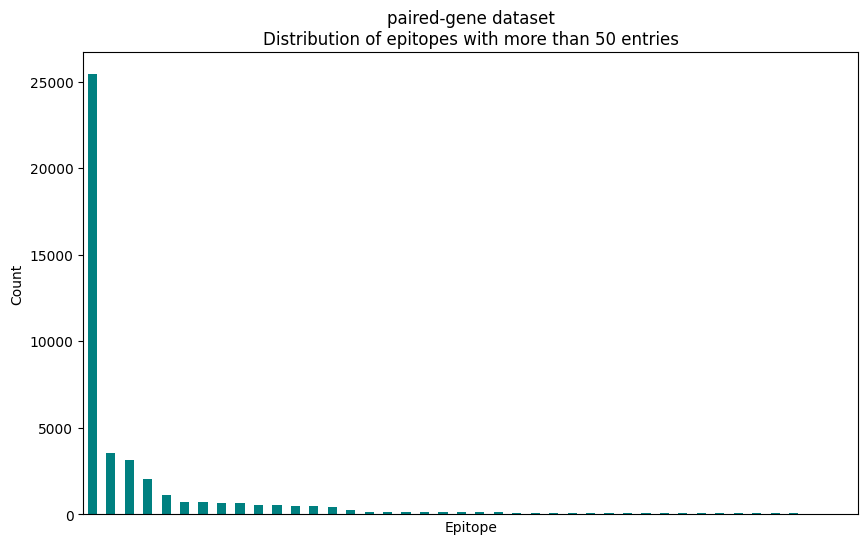

In [507]:
# Count the occurrences of each Epitope
epitope_counts = df['Epitope'].value_counts()

# Filter Epitopes that have more than 2 entries
filtered_epitope_counts = epitope_counts[epitope_counts > 50]

# Plotting
plt.figure(figsize=(10, 6))
filtered_epitope_counts.plot(kind='bar', color='teal')
plt.xlabel('Epitope')
plt.ylabel('Count')
plt.title(f'paired-{precision} dataset\nDistribution of epitopes with more than 50 entries')
#plt.xticks(rotation=45)
plt.xticks([])
plt.show()

## CDR-3 Regions (alpha)

In [508]:
unique_cdr_count = df["TRA_CDR3"].value_counts().count()
print(f"there are {unique_cdr_count} distinct CDR-3 alpha regions")

there are 22971 distinct CDR-3 alpha regions


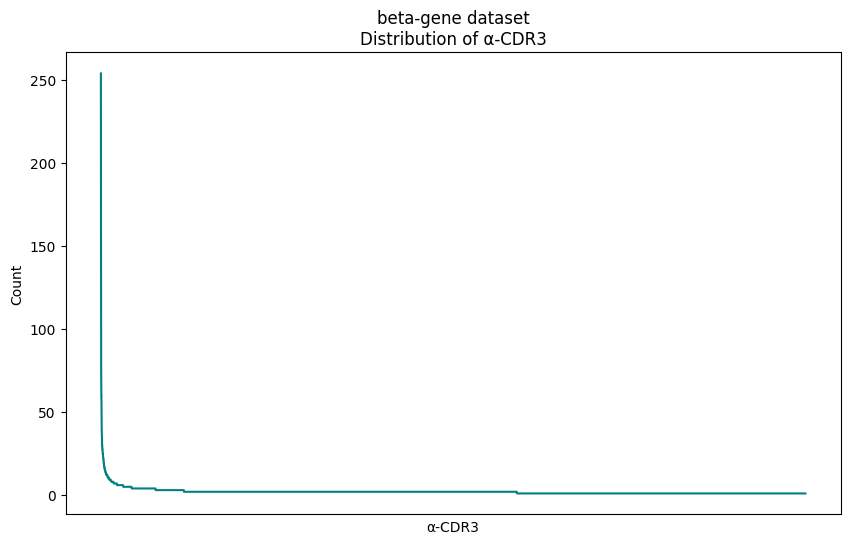

In [509]:
# Count the occurrences of each CDr3
cdr_counts = df['TRA_CDR3'].value_counts()

filtered_cdr_counts = cdr_counts#[cdr_counts > 1]

# Plotting
plt.figure(figsize=(10, 6))
filtered_cdr_counts.plot(kind='line', color='teal')
plt.xlabel('α-CDR3')
plt.ylabel('Count')
plt.title(f'beta-{precision} dataset\nDistribution of α-CDR3')
plt.xticks([])
plt.show()

Distribution of TRA_CDR3 sequence lengths

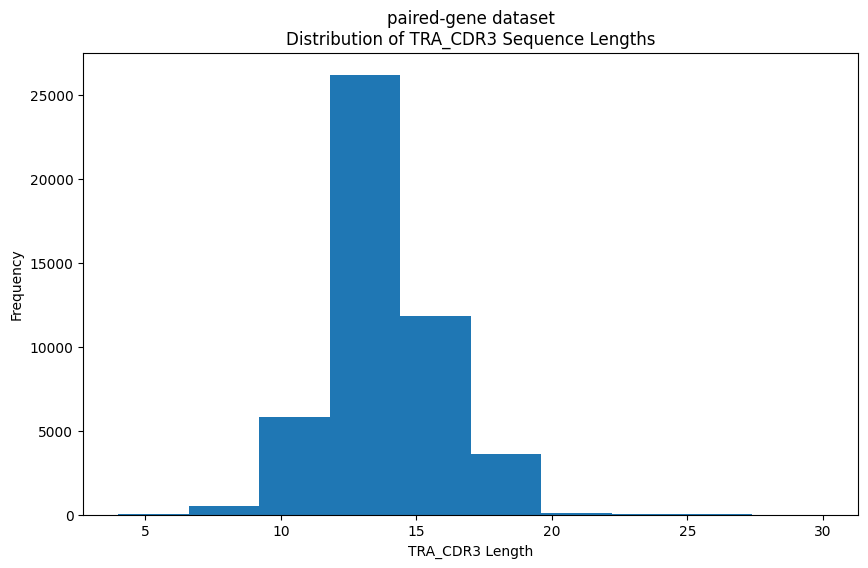

In [510]:
# Calculate TRA_CDR3 sequence lengths
df['TRA_CDR3_Length'] = df['TRA_CDR3'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['TRA_CDR3_Length'])
plt.title(f'paired-{precision} dataset\nDistribution of TRA_CDR3 Sequence Lengths')
plt.xlabel('TRA_CDR3 Length')
plt.ylabel('Frequency')
plt.show()

## CDR-3 Regions (beta)

In [511]:
unique_cdr_count = df["TRB_CDR3"].value_counts().count()
print(f"there are {unique_cdr_count} distinct CDR-3 beta regions")

there are 24803 distinct CDR-3 beta regions


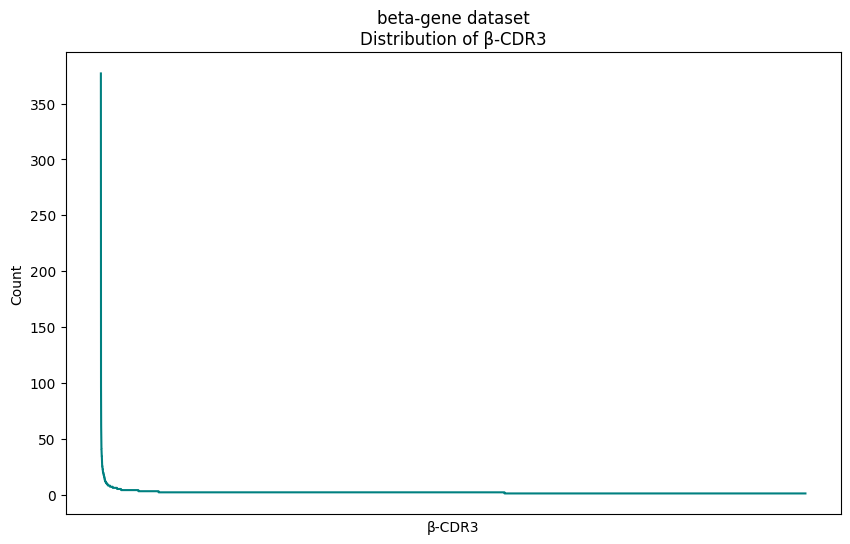

In [512]:
# Count the occurrences of each CDr3
cdr_counts = df['TRB_CDR3'].value_counts()

filtered_cdr_counts = cdr_counts#[cdr_counts > 1]

# Plotting
plt.figure(figsize=(10, 6))
filtered_cdr_counts.plot(kind='line', color='teal')
plt.xlabel('β-CDR3')
plt.ylabel('Count')
plt.title(f'beta-{precision} dataset\nDistribution of β-CDR3')
plt.xticks([])
plt.show()

Distribution of TRB_CDR3 sequence lengths

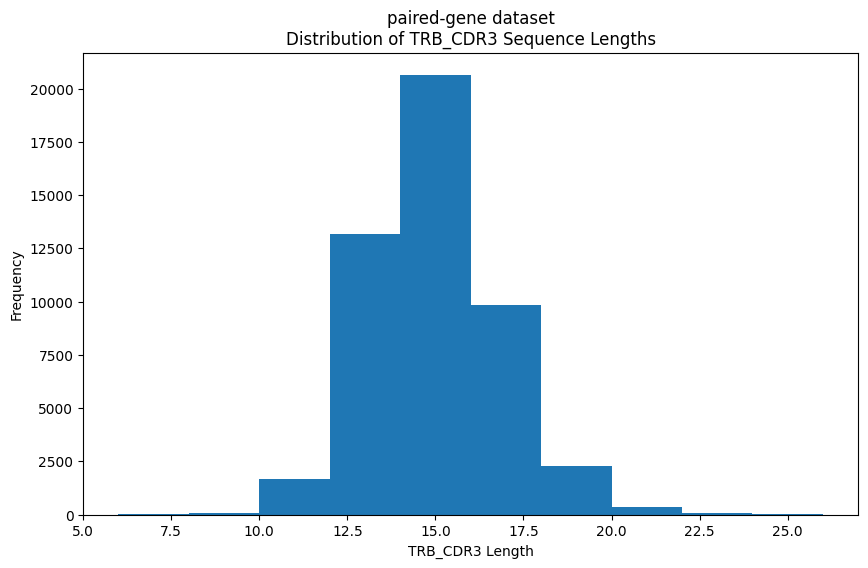

In [513]:
# Calculate TRB_CDR3 sequence lengths
df['TRB_CDR3_Length'] = df['TRB_CDR3'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(df['TRB_CDR3_Length'])
plt.title(f'paired-{precision} dataset\nDistribution of TRB_CDR3 Sequence Lengths')
plt.xlabel('TRB_CDR3 Length')
plt.ylabel('Frequency')
plt.show()

## V and J region (alpha)

How many entries do have V **and** J region

In [514]:
paired_VJ_count = df[["TRAV", "TRAJ"]].notnull().all(axis=1).sum()
print(f"There are {paired_VJ_count} entries which have the V and J region")

There are 29571 entries which have the V and J region


visual representation of the distribution of V and J regions

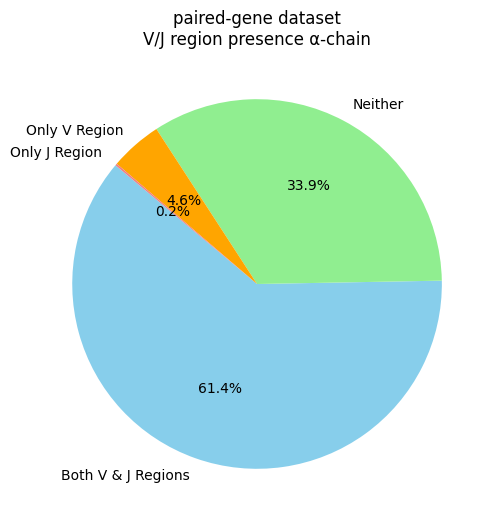

In [515]:
# Define a function to categorize each entry
def categorize_row(row):
    if pd.notnull(row['TRAV']) and pd.notnull(row['TRAJ']):
        return 'Both V & J Regions'
    elif pd.notnull(row['TRAV']):
        return 'Only V Region'
    elif pd.notnull(row['TRAJ']):
        return 'Only J Region'
    else:
        return 'Neither'

# Apply the function to each row
df['Category'] = df.apply(categorize_row, axis=1)

# Count the number of entries in each category
category_counts = df['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title(f'paired-{precision} dataset\nV/J region presence α-chain')
plt.show()

Exploring how many unique combinations of TRAV and TRAJ genes there are could be informative. This might help in understanding the diversity of T-cell receptor beta chains represented in data.

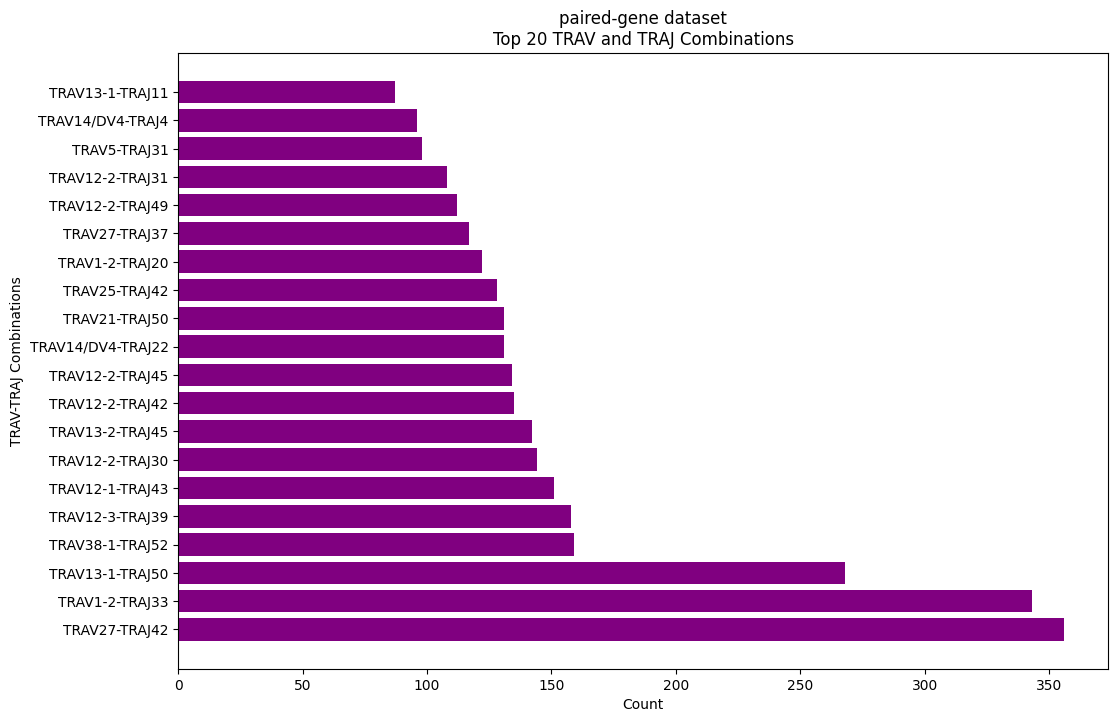

In [516]:
# Count unique TRBV and TRBJ combinations
unique_combinations = df.groupby(['TRAV', 'TRAJ']).size().reset_index(name='Count')

# Plotting the top 20 most frequent combinations
top_combinations = unique_combinations.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_combinations['TRAV'] + '-' + top_combinations['TRAJ'], top_combinations['Count'], color='purple')
plt.xlabel('Count')
plt.ylabel('TRAV-TRAJ Combinations')
plt.title(f'paired-{precision} dataset\nTop 20 TRAV and TRAJ Combinations')
plt.show()

## V and J region (beta)

How many entries do have V **and** J region

In [517]:
paired_VJ_count = df[["TRBV", "TRBJ"]].notnull().all(axis=1).sum()
print(f"There are {paired_VJ_count} entries which have the V and J region")

There are 30457 entries which have the V and J region


visual representation of the distribution of V and J regions. 

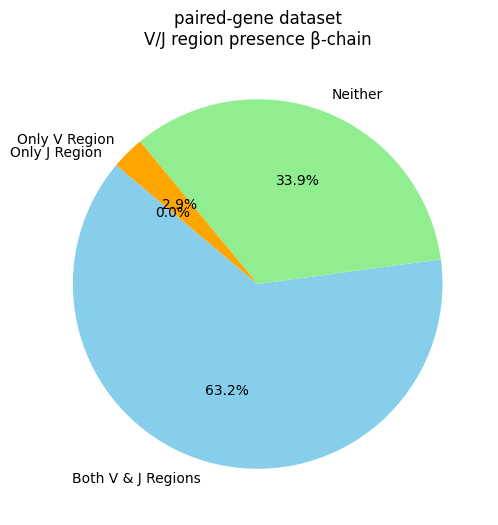

In [518]:
# Define a function to categorize each entry
def categorize_row(row):
    if pd.notnull(row['TRBV']) and pd.notnull(row['TRBJ']):
        return 'Both V & J Regions'
    elif pd.notnull(row['TRBV']):
        return 'Only V Region'
    elif pd.notnull(row['TRBJ']):
        return 'Only J Region'
    else:
        return 'Neither'

# Apply the function to each row
df['Category'] = df.apply(categorize_row, axis=1)

# Count the number of entries in each category
category_counts = df['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title(f'paired-{precision} dataset\nV/J region presence β-chain')
plt.show()

Exploring how many unique combinations of TRBV and TRBJ genes there are could be informative. This might help in understanding the diversity of T-cell receptor beta chains represented in data.

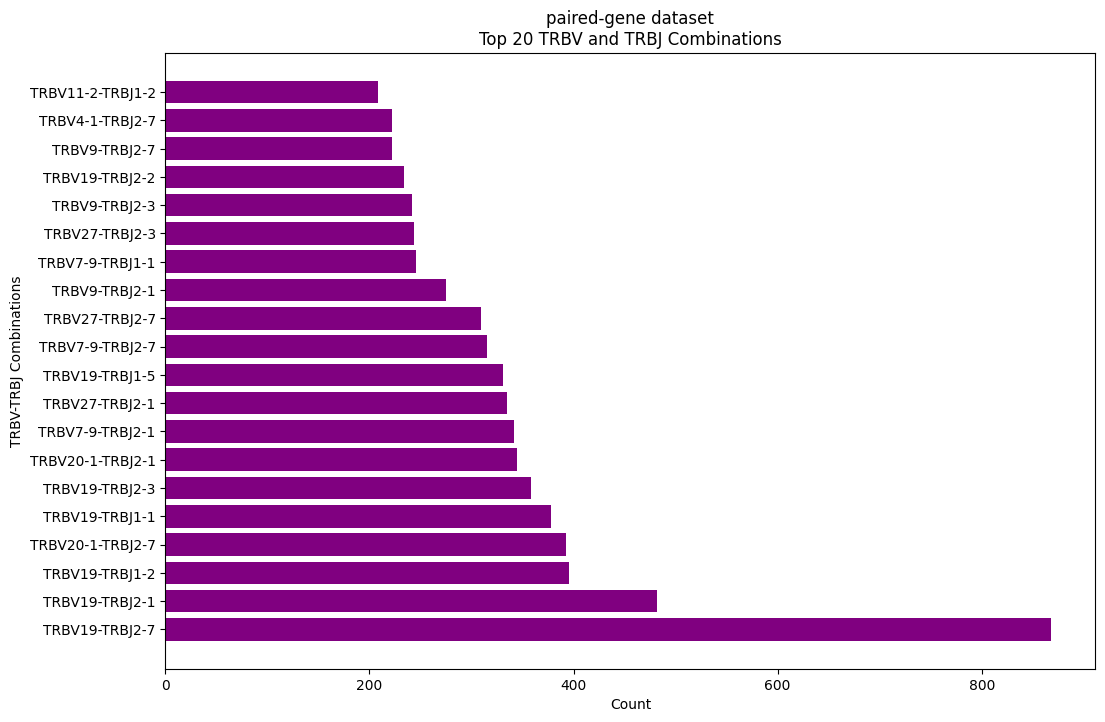

In [519]:
# Count unique TRBV and TRBJ combinations
unique_combinations = df.groupby(['TRBV', 'TRBJ']).size().reset_index(name='Count')

# Plotting the top 20 most frequent combinations
top_combinations = unique_combinations.sort_values(by='Count', ascending=False).head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_combinations['TRBV'] + '-' + top_combinations['TRBJ'], top_combinations['Count'], color='purple')
plt.xlabel('Count')
plt.ylabel('TRBV-TRBJ Combinations')
plt.title(f'paired-{precision} dataset\nTop 20 TRBV and TRBJ Combinations')
plt.show()

### V Region
How many entries do have a V region and how many different V regions are there

In [520]:
unique_V_count = df['TRAV'].nunique()
print(f"There are {unique_V_count} distinct V regions in alpha chain")
unique_V_count = df['TRBV'].nunique()
print(f"There are {unique_V_count} distinct V regions in beta chain")

There are 48 distinct V regions in alpha chain
There are 60 distinct V regions in beta chain


In [521]:
V_count = df["TRAV"].notnull().sum()
print(f"There are {V_count} entries for J region in alpha chain")
V_count = df["TRBV"].notnull().sum()
print(f"There are {V_count} entries for J region in beta chain")

There are 31765 entries for J region in alpha chain
There are 31850 entries for J region in beta chain


### J Region
How many entries do have J region and how many different J regions are there

In [522]:
unique_J_count = df["TRAJ"].nunique()
print(f"There are {unique_J_count} unique J regions in alpha chain")
unique_J_count = df["TRBJ"].nunique()
print(f"There are {unique_J_count} unique J regions in beta chain")

There are 55 unique J regions in alpha chain
There are 14 unique J regions in beta chain


In [523]:
J_count = df["TRAJ"].notnull().sum()
print(f"There are {J_count} entries for J region in alpha chain")
J_count = df["TRBJ"].notnull().sum()
print(f"There are {J_count} entries for J region in beta chain")

There are 29650 entries for J region in alpha chain
There are 30464 entries for J region in beta chain


## MHC
How many entries do have MHC A **and** MHC B value

In [524]:
paired_MHC_count = df[["MHC"]].notnull().all(axis=1).sum()
print(f"There are {paired_MHC_count} entries which have the MHC region")

There are 47988 entries which have the MHC region


In [525]:
unique_MHC_count = df["MHC"].nunique()
print(f"There are {unique_MHC_count} unique MHC values")

There are 4 unique MHC values


In [526]:
MHC_count = df["MHC"].notnull().sum()
print(f"There are {MHC_count} entries MHC")

There are 47988 entries MHC


Distribution of MHC

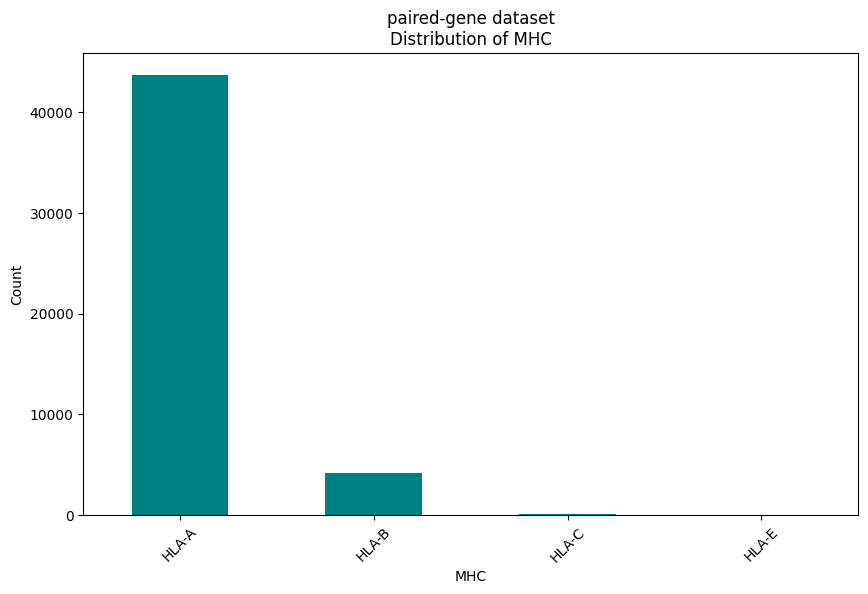

In [527]:
# Count the occurrences of each MHC
mhc_counts = df['MHC'].value_counts()

# Filter Epitopes that have more than 2 entries
if precision == 'gene':
  filtered_mhc_counts = mhc_counts
else:
  filtered_mhc_counts = mhc_counts[mhc_counts > 5]

# Plotting
plt.figure(figsize=(10, 6))
filtered_mhc_counts.plot(kind='bar', color='teal')
plt.xlabel('MHC')
plt.ylabel('Count')
if precision == 'gene':
  plt.title(f'paired-{precision} dataset\nDistribution of MHC')
else:
  plt.title(f'paired-{precision} dataset\nDistribution of MHC with more than 5 entries')
plt.xticks(rotation=45)
plt.show()